In [1]:
import pandas as pd
import nltk

In [2]:
#Read the csv file
df = pd.read_csv("spam.csv", encoding="latin-1")

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#Remove empty columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
#Rename columns
df.rename(columns={'v1':'target', 'v2':'sms'},inplace=True)
df.sample(5)

,target,sms
125,ham,"Good stuff, will do."
2411,ham,"Come to me right now, Ahmad"
1151,ham,"Sorry, I'll call later"
327,ham,"I'd say that's a good sign but, well, you know..."
2359,spam,Spook up your mob with a Halloween collection ...


In [7]:
#Group by the target values
df.groupby('target').describe()

sms                                                               
       count unique                                                top freq
target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
df.groupby('target').describe()

sms                                                               
       count unique                                                top freq
target                                                                     
ham     4516   4516                         Rofl. Its true to its name    1
spam     653    653  This is the 2nd time we have tried 2 contact u...    1

In [10]:
df["Length"] = df["sms"].apply(len)

df.head(2)

,target,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

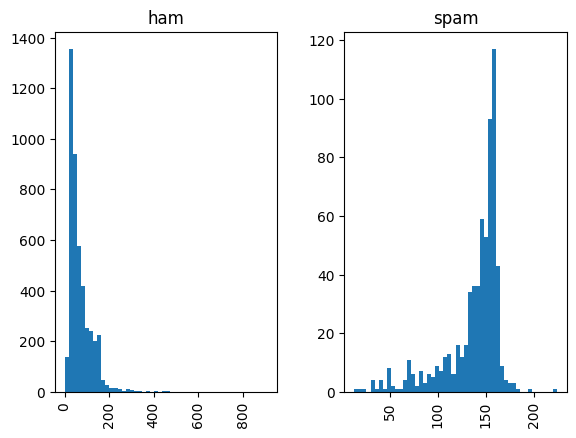

In [11]:
df.hist(column='Length', by='target', bins=50)

Step2 - Preprocessing

In [12]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

ps = PorterStemmer()

In [33]:
# Download all necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\DASUN SRI
[nltk_data]     NETHMAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\DASUN SRI
[nltk_data]     NETHMAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
df.head(5)

,target,sms,Length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong avail bugi n great world la e cine g...
1,ham,Ok lar... Joking wif u oni...,29,ok joke wif u
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli u c alreadi
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe live around though


Preprocessing Task
 * Lower Case
 * Tokeniization
 * Removing special characters
 * Removing Stop words and punctuation
 * stemming

In [36]:
import string

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    text = nltk.word_tokenize(text)
    
    """  try:
            # Try to use nltk tokenizer if available
            text = nltk.word_tokenize(text)
        except LookupError:
            # Fallback to simple tokenization if nltk resources aren't available
            text = text.split() """
    
    y = []
    
    # Remove non-alphanumeric tokens
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Apply stemming
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [120]:
import string
import re

def clean_text_simple(text):
    """A simplified version of clean_text that doesn't rely on NLTK's word_tokenize"""
    # Convert to lowercase
    text = text.lower()
    
    # Replace punctuation with spaces and split
    for p in string.punctuation:
        text = text.replace(p, ' ')
    
    # Split into tokens
    words = text.split()
    
    # Filter out stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    
    # Apply stemming
    words = [ps.stem(word) for word in words]
    
    # Join back to string
    return " ".join(words)

In [37]:
df['sms_cleaned'] = df['sms'].apply(clean_text)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\DASUN SRI NETHMAL/nltk_data'
    - 'c:\\Users\\DASUN SRI NETHMAL\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'c:\\Users\\DASUN SRI NETHMAL\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'c:\\Users\\DASUN SRI NETHMAL\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\DASUN SRI NETHMAL\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [18]:
df[['sms', 'sms_cleaned']].head(5)

,sms,sms_cleaned
0,"Go until jurong point, crazy.. Available only ...",go jurong avail bugi n great world la e cine g...
1,Ok lar... Joking wif u oni...,ok joke wif u
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,u dun say earli u c alreadi
4,"Nah I don't think he goes to usf, he lives aro...",nah think goe live around though


Step 3 - Features Extraction

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tf_vec = TfidfVectorizer(max_features=3000)
X = tf_vec.fit_transform(df['sms_cleaned']).toarray()

In [21]:
X.shape

(5169, 3000)

In [22]:
Y = df['target'].values

Step4 - Learning

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [24]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [25]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.9632495164410058
